In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold, cross_val_score

In [5]:
dataset = pd.read_csv('./HU_nhom_02.csv')

# Hiển thị số mẫu dữ liệu tương ứng với từng nhãn
print(dataset.groupby('label').size())

label
4    72
5    73
6    56
dtype: int64


In [10]:
print("Support Vector Machine ...")
X = dataset.drop('label', axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = SVC()

parameters = {'kernel':['rbf','linear'],'C':[0.0001,0.001,0.005,0.1,0.5,1, 10,100],'gamma':[0.0000001,0.000001,0.00001, 0.0001, 0.001,0.005 ,0.01, 0.1,1]}

model = GridSearchCV(classifier, parameters, cv=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#calculates the average mean and std arcross all paramter combinations
mean = sum(model.cv_results_['mean_test_score'])/len(model.cv_results_['mean_test_score'])
std = sum(model.cv_results_['std_test_score'])/len(model.cv_results_['std_test_score'])
# Report the best parameters
print("Best CV params", model.best_params_)
print("Best CV accuracy", model.best_score_)
print('Average mean across all parameter combination: ',mean,'Average std across all parameter combinations: ',std)

#printing predicted values from test data
for i in range(len(y_pred)):
    print('Actual:',y_test.iloc[i],'Predicted:',y_pred[i])



Support Vector Machine ...
Best CV params {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best CV accuracy 0.99375
Average mean across all parameter combination:  0.571744791666667 Average std across all parameter combinations:  0.15083642142849843
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 4 Predicted: 4
Actual: 6 Predicted: 6
Actual: 5 Predicted: 5
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 6 Predicted: 6
Actual: 6 Predicted: 6
Actual: 4 Predicted: 4
Actual: 4 Predicted: 4
Actual: 6 Predicted: 6
Actual: 6 Predicted: 6
Actual: 5 Predicted: 5
Actual: 6 Predicted: 6
Actual: 6 Predicted: 6
Actual: 4 Predicted: 4
Actual: 6 Predicted: 6
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 6 Predicted: 6
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 4 Predicted: 4
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 5 Predicted: 5
Actual: 5 Predicted: 5
Actual: 4 Predicted: 4
Actual: 4 Predicted: 4
Actual: 4 Predicted: 4


Results for fold 1:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        11

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Accuracy for fold 1: 1.0
Precision for fold 1: [1. 1. 1.]
Recall for fold 1: [1. 1. 1.]
F1 score for fold 1: [1. 1. 1.]
--------------------------------------------------
Results for fold 2:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy for fold 2: 1.0
Pr

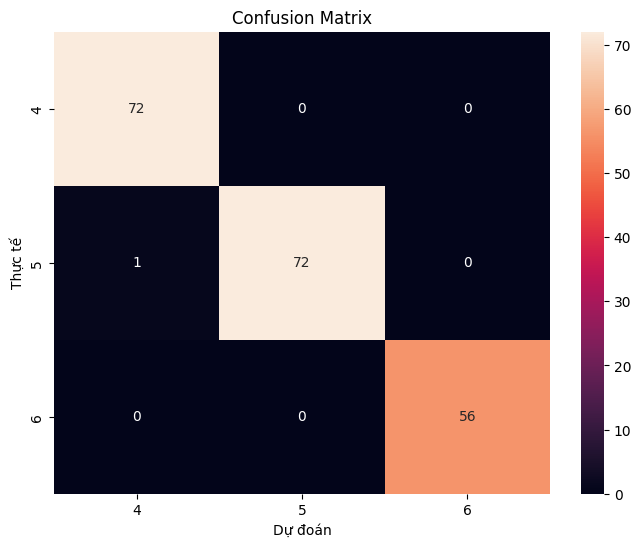

Accuracy average: 0.9949999999999999 0.9949999999999999
Precision average: [0.98571429 1.         1.        ] 0.9952380952380953
Recall average: [1.         0.98571429 1.        ] 0.9952380952380953
F1 score average: [0.99259259 0.99259259 1.        ] 0.9950617283950617
Duration: 0:00:00.001998


In [13]:
best_model= SVC(kernel=model.best_params_['kernel'],C=model.best_params_['C'],gamma=model.best_params_['gamma'])

kf = KFold(n_splits=5, random_state=42, shuffle=True)

fold = 0
cm =0
accuracy_tb = 0
precision_tb = 0
recall_tb = 0
f1_tb = 0
for train_index, test_index in kf.split(X):
    fold += 1
    # Chia tập dữ liệu theo chỉ số được tạo bởi KFold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình trên tập huấn luyện
    best_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm thử
    y_pred = best_model.predict(X_test)

    # Hiển thị báo cáo phân loại cho từng fold
    print(f"Results for fold {fold}:")
    print(classification_report(y_test, y_pred))
    # Hiển thị ma trận nhầm lẫn cho từng fold
    cm_fold = confusion_matrix(y_test, y_pred)
    cm += cm_fold

    # tính tổng accracy, precision, recall, f1_score cho từng fold
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    print(f"Accuracy for fold {fold}: {accuracy}")
    print(f"Precision for fold {fold}: {precision}")
    print(f"Recall for fold {fold}: {recall}")
    print(f"F1 score for fold {fold}: {f1}")
    print("--------------------------------------------------")
    # Tính accuracy, precision, recall, f1_score trung bình 
    accuracy_tb += accuracy
    precision_tb += precision
    recall_tb += recall
    f1_tb += f1

    


# Hiển thị ma trận nhầm lẫn cho toàn bộ dữ liệu
print("Confusion matrix for all data:")
print(cm)
class_labels = ['4', '5', '6']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
plt.show()

# Tính accuracy, precision, recall, f1_score trung bình
accuracy_tb /= fold
precision_tb /= fold
recall_tb /= fold
f1_tb /= fold
print(f"Accuracy average: {accuracy_tb}", np.mean(accuracy_tb))
print(f"Precision average: {precision_tb}", np.mean(precision_tb))
print(f"Recall average: {recall_tb}", np.mean(recall_tb))
print(f"F1 score average: {f1_tb}", np.mean(f1_tb))

# Hiển thị thời gian xử lý 1 mẫu với đơn vị milisecond
start_time = datetime.now()
best_model.predict(X_test.iloc[0:1])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))